In [96]:
# On se place dans trois villes de France qui contiennent suffisamment de données
# J'ai choisi Nantes, Lyon, Marseille
# Le but est dans un premier temps est d'effectuer une première analyse des données
# Les données sont dèja filtrées selon les paramètres suivant :

# - Suppression des colonnes vides
# - Suppression des doublons (lignes identiques)
# - On garde uniquement les ventes sur des Maisons et Appartements
# - Afin de s'assurer de la qualité des données, je choisis de supprimer les ventes de moins de 10 000€
# - Choix d'une ville, car les prix son très dépendant de la situation géographique d'un bien
# - Je choisis également de supprimer les ventes de plus de 3 000 000€ (car trop particulier comme vente)
# - Conversion en float et on garde uniquement les colonnes que j'ai estimé pertinentes 

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# On importe les données afin de les analyser visuellement 
nantes = pd.read_csv('Projet/Data/NANTES_44_data.csv')
lyon = pd.read_csv('Projet/Data/LYON_69_data.csv')
marseille = pd.read_csv('Projet/Data/MARSEILLE_13_data.csv')

In [100]:
# Analyse des données
def analyse(data) :
    
    print(data['Valeur fonciere'].describe())
    res = stats.probplot(data['Valeur fonciere'], plot=plt)

    # Top 10 HeatMap
    matrice = data.corr()
    k = 10 # Nombre de variables à garder dans la HeatMap
    cols = matrice.nlargest(k, 'Valeur fonciere')['Valeur fonciere'].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(12, 6))
    hm = sns.heatmap(cm, annot=True, square=True, 
                     annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)

count    1.444700e+04
mean     2.251125e+05
std      2.296048e+05
min      1.000000e+04
25%      1.000000e+05
50%      1.577500e+05
75%      2.674000e+05
max      2.900000e+06
Name: Valeur fonciere, dtype: float64


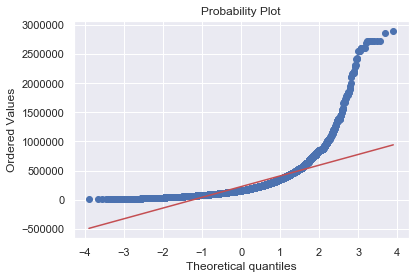

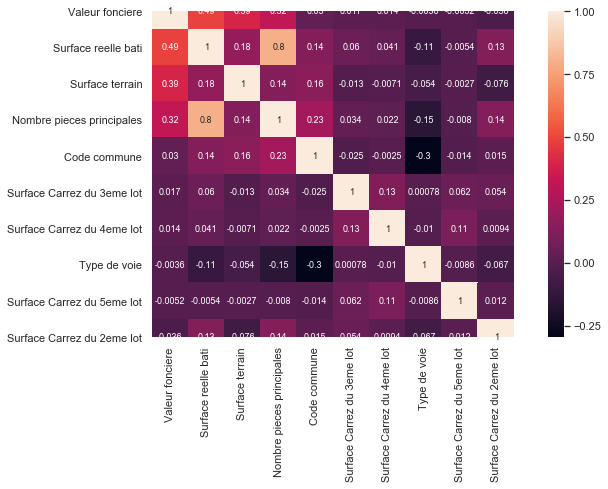

In [103]:
# Faire l'analyse des trois villes
analyse(marseille)

In [104]:
data = pd.read_csv("Projet/Results/NN_results_MARSEILLE_13.csv")

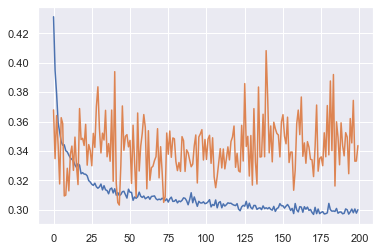

In [106]:
plt.plot(data['mae'])
plt.plot(data['val_mae'])

In [107]:
xgb = pd.read_csv("Projet/Results/XGB_results_MARSEILLE_13.csv")

In [121]:
print(xgb)

  Unnamed: 0                                       validation_0
0       rmse  [0.836811, 0.821573, 0.790247, 0.777423, 0.769...
